<a href="https://colab.research.google.com/github/Samuel-Njoroge/School_Drop_out_Prediction_with_SVMs/blob/main/School_Dropout_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning with Support Vector Classifier.
Analyzing and predicting the dropout rates for University Students.
The objective is to have an early detection when someone is about to drop out and plan to devise a strategy to reach out to those students and help them as early as possible.

# Library imports

In [55]:
import pandas as pd #for reading the data
from sklearn.preprocessing import MinMaxScaler #for data standardization
from sklearn.model_selection import train_test_split #to split the data into train and test parts
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder #to encode the data to numerical
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report, cohen_kappa_score, matthews_corrcoef, log_loss, \
ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV #for cross validation
from sklearn.metrics import classification_report #for cross validation
import matplotlib.pyplot as plt

In [56]:
#mounting the drive.
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Loading the dataset.

In [57]:
school_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning_SVMs/School_Drop_Out_ML/student_dropout.csv", dtype = str)
school_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.66666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13,0,13.9,-0.3,0.79,Graduate


#### Checking target class distribution and check for missing values

In [58]:
#Checking the total values in the Target column
school_data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [59]:
#Checking missing values.
school_data['Target'].isnull().sum()

0

In [60]:
#school_data.drop(['Marital status'] ,axis=1)

## Preprocessing

#### Defining the target and the inputs

In [61]:
target = school_data['Target']
inputs = school_data.drop(['Target'] , axis = 1)

#### Creating a training and a testing dataset

In [67]:
x_train , x_test , y_train, y_test = train_test_split(inputs, target , test_size = 0.2, random_state = 365,stratify = target  )

In [68]:
#Size of the training dataset.
y_train.value_counts()

Graduate    1767
Dropout     1137
Enrolled     635
Name: Target, dtype: int64

In [69]:
#Size of the test dataset.
y_test.value_counts()

Graduate    442
Dropout     284
Enrolled    159
Name: Target, dtype: int64

#### Defining an encoder for the target 

Label encoding helps in  preserving the target labels.

Ordinal encoding transforms categorical data into numerical.

In [74]:
enc_i = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
enc_t = LabelEncoder()

#### Applying the fit_transform() method on the training data and the transform() method on the test data.

In [75]:
x_train_transf = enc_i.fit_transform(x_train)
x_test_transf = enc_i.transform(x_test)

y_train_transf = enc_t.fit_transform(y_train)
y_test_transf = enc_t.transform(y_test)


In [76]:
y_train_transf

array([2, 2, 2, ..., 0, 2, 2])

In [77]:
x_train_transf

array([[0., 0., 2., ..., 7., 6., 4.],
       [0., 0., 1., ..., 6., 2., 0.],
       [0., 0., 1., ..., 1., 4., 8.],
       ...,
       [0., 9., 1., ..., 6., 2., 0.],
       [0., 0., 1., ..., 9., 1., 2.],
       [0., 0., 5., ..., 9., 1., 2.]])

### Rescaling to the range [-1, 1]

In [78]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train_transf)
x_train_rescaled = scaling.transform(x_train_transf)

### Choose a C value of 1

In [79]:
C = 1.0

## Classification

In [80]:
svc = svm.SVC(kernel ='linear' ,C = C).fit(x_train_rescaled , y_train_transf)

In [81]:
y_pred_test = svc.predict(scaling.transform(x_test_transf))

#### Evaluating the model on the test data

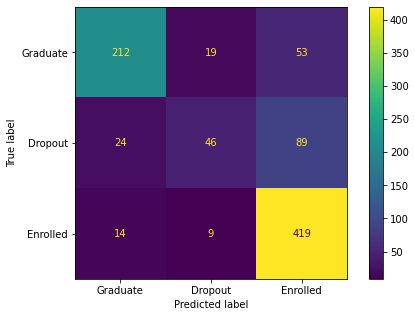

In [82]:
#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_transf, y_pred_test),
    display_labels=["Graduate" , "Dropout", "Enrolled"],
   
)

cmp.plot(ax=ax);

In [83]:
#classification report
print(classification_report(y_test_transf,y_pred_test,target_names = ["Graduate" , "Dropout", "Enrolled"]))

              precision    recall  f1-score   support

    Graduate       0.85      0.75      0.79       284
     Dropout       0.62      0.29      0.39       159
    Enrolled       0.75      0.95      0.84       442

    accuracy                           0.76       885
   macro avg       0.74      0.66      0.67       885
weighted avg       0.76      0.76      0.74       885



## Classification with different kernels

### Creating and testing the svms with the respective kernels and C values


In [84]:
#linear, C = 1
#rbf, gamma = 1e-3 C = 1
#sigmoid, C = 1
#poly, C = 10
tuned_parameters = [
    {'kernel':['linear'] , 'C':[1,10]},
    {'kernel' :['poly'] , 'C':[1,10]},
    {'kernel' :['sigmoid'] , 'C':[1,10]},
    {'kernel':['rbf'],'gamma':[1e-3],'C':[1,10]}
]

In [85]:
#classification report for each classifier
scores = ['precision' , 'recall']

In [86]:
for score in scores:
  print('Tuning hyper-parameters for %s ' % score)
  print()

  clf = GridSearchCV(svm.SVC() , tuned_parameters , scoring='%s_macro' % score)
  clf.fit(x_train_rescaled , y_train_transf)

  print('Best parameters set found on development set')
  print()
  print(clf.best_params_)
  print()
  print('Grid scores on development set:')
  print()
  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']
  for mean , std ,params in zip(means , stds , clf.cv_results_['params']):
    print('%0.3f , (+/-%0.03f) for %r ' % (mean ,std* 2 , params))
  print()

  print('Detailed classification report:')
  print()
  print('The model is trained on the full development set')
  print('The scores are are computed on the full evaluation set')
  print()
  y_true , y_pred = y_test_transf , clf.predict(scaling.transform(x_test_transf))
  print(classification_report(y_true , y_pred))
  print()


Tuning hyper-parameters for precision 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

Best parameters set found on development set

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.684 , (+/-0.048) for {'C': 1, 'kernel': 'linear'} 
0.683 , (+/-0.029) for {'C': 10, 'kernel': 'linear'} 
0.677 , (+/-0.041) for {'C': 1, 'kernel': 'poly'} 
0.659 , (+/-0.023) for {'C': 10, 'kernel': 'poly'} 
0.587 , (+/-0.093) for {'C': 1, 'kernel': 'sigmoid'} 
0.522 , (+/-0.059) for {'C': 10, 'kernel': 'sigmoid'} 
0.481 , (+/-0.021) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} 
0.644 , (+/-0.068) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} 

Detailed classification report:

The model is trained on the full development set
The scores are are computed on the full evaluation set

              precision    recall  f1-score   support

           0       0.85      0.75      0.79       284
           1       0.62      0.29      0.39       159
           2       0.75      0.95      0.84       442

    accuracy                           0.76       885
   macro avg       0.74     